<a href="https://colab.research.google.com/github/sejallotliker/Advanced_python/blob/main/unsuperbised_learning/Hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hierarchical Clustering Implementation

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [26]:
#Import IRIS dataset
iris = datasets.load_iris()

In [27]:
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
#To apply feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_iris_data = scaler.fit_transform(iris_data)

In [29]:
#To convert the 4D data to 2D data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(scaled_iris_data)

In [30]:
pca_scaled.shape

(150, 2)

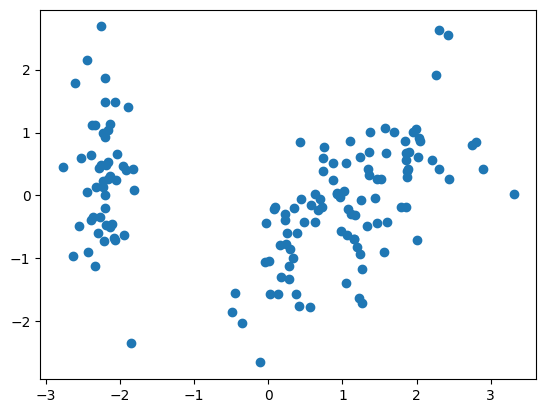

In [31]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1])

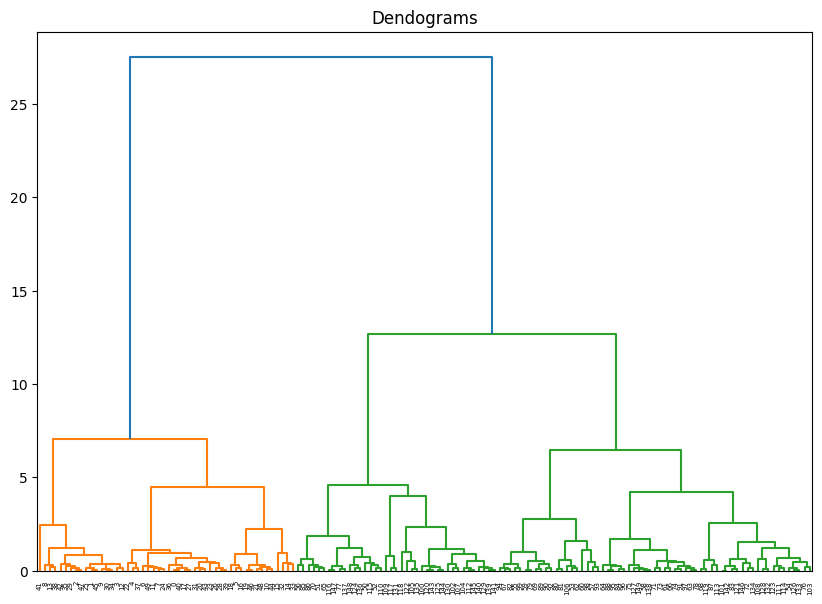

In [32]:
#To make dendogram:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(pca_scaled, method='ward')) #Method = ward --> Euclidean dist

In [33]:
#To apply hierarchical clustering --> Agglomeration
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster.fit_predict(pca_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

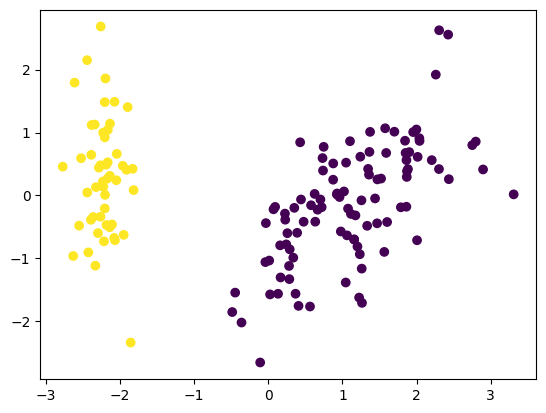

In [34]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c = cluster.labels_)

In [35]:
#Performance metrics
#Silhautte score
from sklearn.metrics import silhouette_score  #Ranges from -1 to 1
silhouette_coefficients = []
for k in range(2, 11):
  agglo = AgglomerativeClustering(n_clusters=k, linkage = 'ward')
  agglo.fit(pca_scaled)
  score = silhouette_score(pca_scaled,  agglo.labels_)
  silhouette_coefficients.append(score)

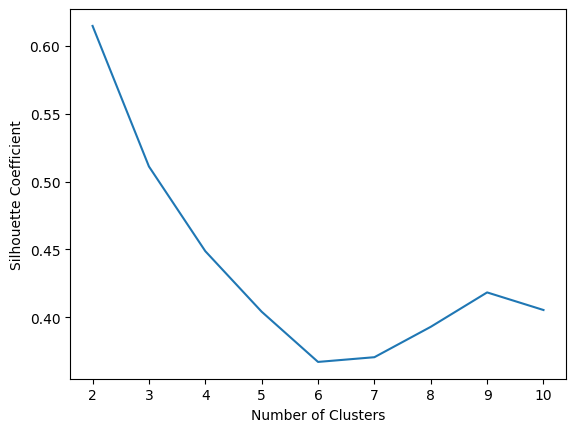

In [36]:
#Plotting silhouette score
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()